<a href="https://colab.research.google.com/github/Avanith12/Handwritten-digit-recognisation/blob/main/HandWritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


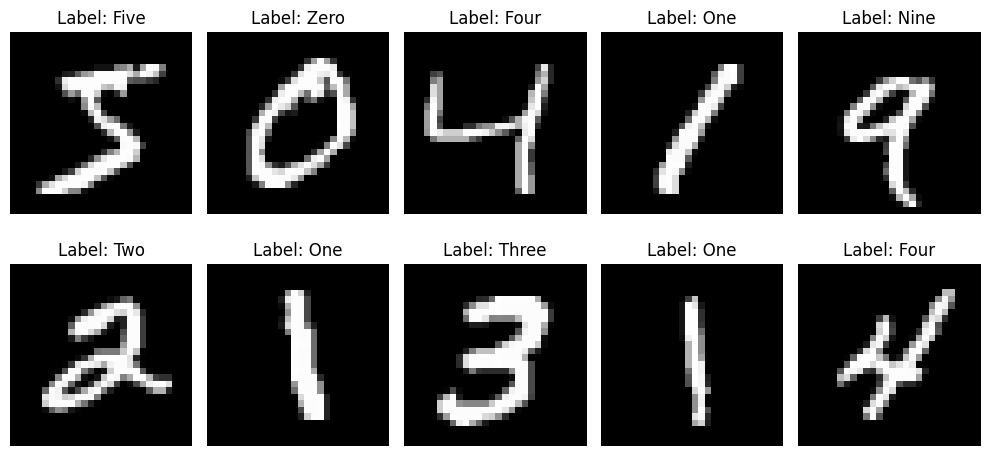

In [ ]:
# Define label names
label_names = ["Zero", "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine"]

# Display a few images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {label_names[y_train[i]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Normalize pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 8s 16ms/step - loss: 0.2510 - accuracy: 0.9274 - val_loss: 0.1246 - val_accuracy: 0.9612
Epoch 2/30
375/375 [==============================] - 7s 19ms/step - loss: 0.0892 - accuracy: 0.9735 - val_loss: 0.1063 - val_accuracy: 0.9678
Epoch 3/30
375/375 [==============================] - 6s 17ms/step - loss: 0.0581 - accuracy: 0.9824 - val_loss: 0.0929 - val_accuracy: 0.9722
Epoch 4/30
375/375 [==============================] - 7s 18ms/step - loss: 0.0411 - accuracy: 0.9868 - val_loss: 0.0844 - val_accuracy: 0.9747
Epoch 5/30
375/375 [==============================] - 6s 16ms/step - loss: 0.0281 - accuracy: 0.9913 - val_loss: 0.0866 - val_accuracy: 0.9762
Epoch 6/30
375/375 [==============================] - 7s 20ms/step - loss: 0.0219 - accuracy: 0.9929 - val_loss: 0.0840 - val_accuracy: 0.9781
Epoch 7/30
375/375 [==============================] - 6s 16ms/step - loss: 0.0172 - accuracy: 0.9944 - val_loss: 0.0970 - val_accuracy: 0.9747

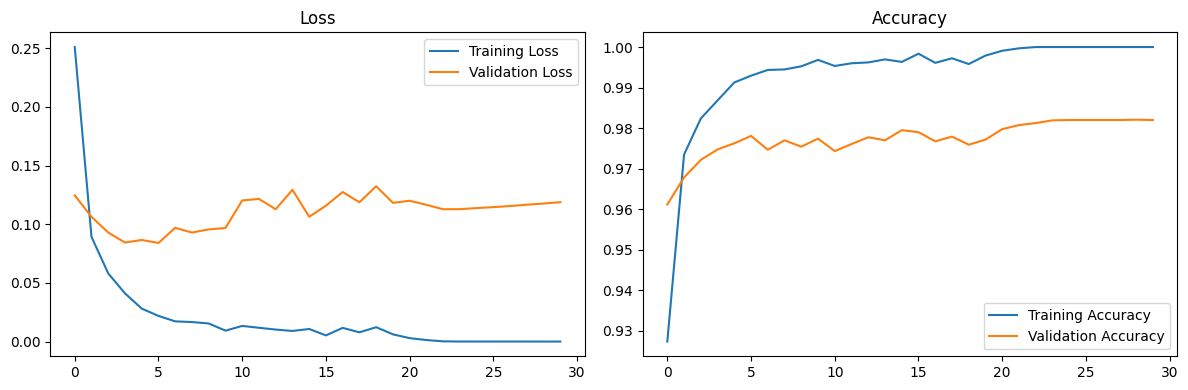

In [ ]:
# Plot training loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

313/313 [==============================] - 2s 6ms/step - loss: 0.0914 - accuracy: 0.9858
Test loss: 0.0914
Test accuracy: 0.9858


313/313 [==============================] - 1s 3ms/step


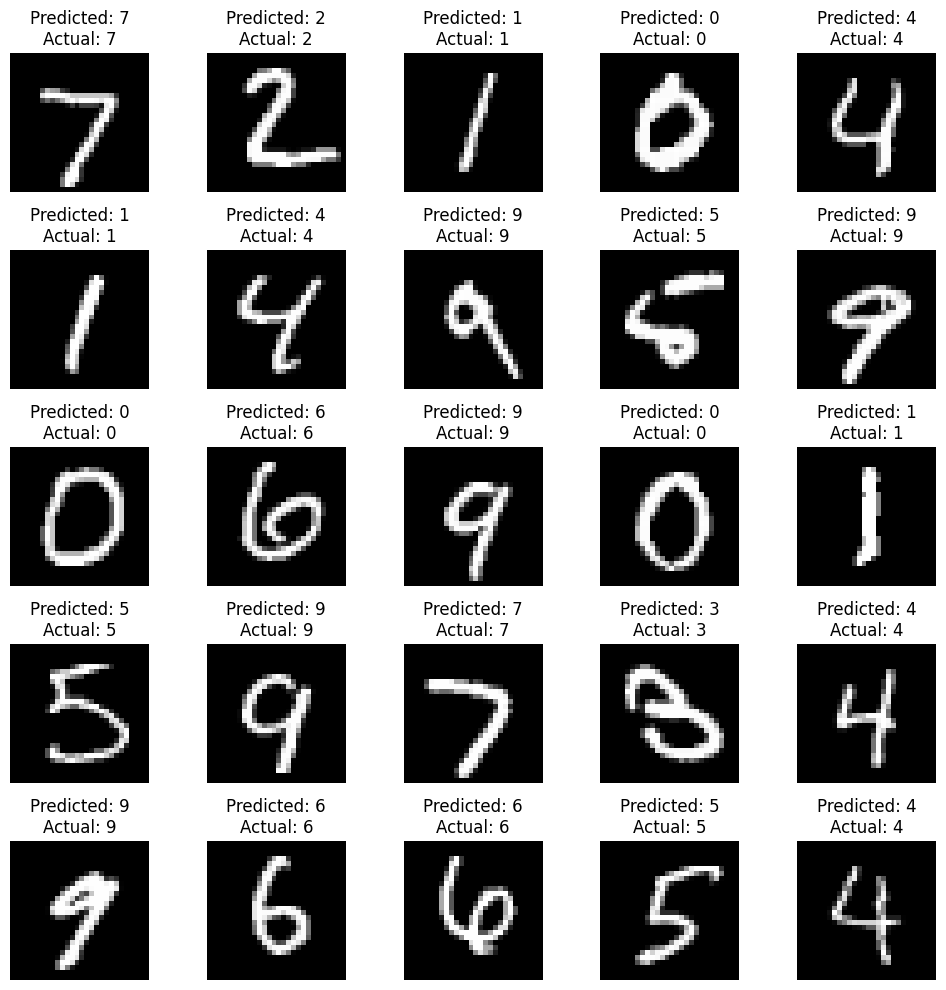

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Find the index with the highest probability for each prediction
predicted_labels = np.argmax(predictions, axis=1)

# Display a few test images along with their predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'Predicted: {predicted_labels[i]}\nActual: {np.argmax(y_test[i])}')
    plt.axis('off')

plt.tight_layout()
plt.show()